In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import loadmat
import pandas as pd

# convert matlab file to pandas dataframe then convert it to numpy array

In [3]:
data = loadmat('datafile.mat')
# data=data.values()
for i in data:
  if '__' not in i and 'readme' not in i:
              np.savetxt(("file.csv"),data[i],delimiter=',')
data=pd.read_csv("/content/file.csv",names=["x","y"])
data=data.to_numpy()

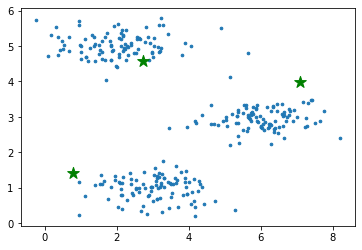

In [4]:

# Number of clusters
k = 3
# Number of training data
n = data.shape[0]
# Number of features in the data
c = data.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
np.random.seed(160)
centers = np.random.randn(k,c)*std + mean

# Plot the data and the centers generated as random
plt.scatter(data[:,0], data[:,1], s=7)
plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=150)

In [5]:
centers_old = np.zeros(centers.shape) # to store old centers
centers_new = centers# Store new centers

data.shape
clusters = np.zeros(n)
distances = np.zeros((n,k))

error = np.linalg.norm(centers_new - centers_old)

# When, after an update, the estimate of that center stays the same, exit loop
while error != 0:
    # Measure the distance to every center
    for i in range(k):
        distances[:,i] = np.linalg.norm(data - centers[i], axis=1)
    # Assign all training data to closest center
    clusters = np.argmin(distances, axis = 1)
    
    centers_old = centers_new
    # Calculate mean for every cluster and update the center
    for i in range(k):
        centers_new[i] = np.mean(data[clusters == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)
centers_new  

array([[2.15417853, 4.8700147 ],
       [3.00748649, 0.98785953],
       [6.13908946, 2.94936779]])

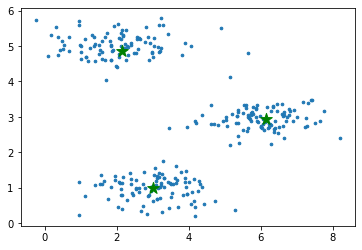

In [6]:
# Plot the data and the centers generated as random
plt.scatter(data[:,0], data[:,1], s=7)
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='g', s=150)